In [1]:
import pandas as pd, numpy as np, json, os
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m=json.loads(open('json/member_timelines.json','r').read())

In [3]:
df=pd.DataFrame(m).groupby(['Name','Csoportok']).first()

In [4]:
df.head(8)

Csoportok0  \
Name         Csoportok                                                                                      
ALBERT Álmos ⏺️ Európa                                                                          ⏺️ Európa   
             🇨🇺 Kuba                                                                              🇨🇺 Kuba   
             🇩🇿 Algéria                                                                        🇩🇿 Algéria   
             🇫🇷 Franciaország                                                            🇫🇷 Franciaország   
             🇲🇦 Marokkó                                                                        🇲🇦 Marokkó   
             🇷🇴 Kovászna                                                                      🇷🇴 Kovászna   
             🌷 RMDSZ - Romániai Magyar Demokrata Szövetség  🌷 RMDSZ - Romániai Magyar Demokrata Szövetség   
             🔀 Állami ügyek                                                                🔀 Állami ügyek   

                                                                                               Csoportok1  \
Name         Csoportok                                                                                      
ALBERT Álmos ⏺️ Európa                                                                          ⏺️ Európa   
             🇨🇺 Kuba                                                                              🇨🇺 Kuba   
             🇩🇿 Algéria                                                                        🇩🇿 Algéria   
             🇫🇷 Franciaország                                                            🇫🇷 Franciaország   
             🇲🇦 Marokkó                                                                        🇲🇦 Marokkó   
             🇷🇴 Kovászna                                                                      🇷🇴 Kovászna   
             🌷 RMDSZ - Romániai Magyar Demokrata Szövetség  🌷 RMDSZ - Romániai Magyar Demokrata Szövetség   
             🔀 Állami ügyek                                                                🔀 Állami ügyek   

                                                                  Simple  \
Name         Csoportok                                                     
ALBERT Álmos ⏺️ Európa                                      Albert Almos   
             🇨🇺 Kuba                                        Albert Almos   
             🇩🇿 Algéria                                     Albert Almos   
             🇫🇷 Franciaország                               Albert Almos   
             🇲🇦 Marokkó                                     Albert Almos   
             🇷🇴 Kovászna                                    Albert Almos   
             🌷 RMDSZ - Romániai Magyar Demokrata Szövetség  Albert Almos   
             🔀 Állami ügyek                                 Albert Almos   

                                                                Típus  \
Name         Csoportok                                                  
ALBERT Álmos ⏺️ Európa                                      Bizottság   
             🇨🇺 Kuba                                           Ország   
             🇩🇿 Algéria                                        Ország   
             🇫🇷 Franciaország                                  Ország   
             🇲🇦 Marokkó                                        Ország   
             🇷🇴 Kovászna                                        Megye   
             🌷 RMDSZ - Romániai Magyar Demokrata Szövetség       Párt   
             🔀 Állami ügyek                                 Bizottság   

                                                           duration  \
Name         Csoportok                                                
ALBERT Álmos ⏺️ Európa                                         1462   
             🇨🇺 Kuba                                           1462   
             🇩🇿 Algéria                                        1462   
             🇫🇷 Franciaország                                  129

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


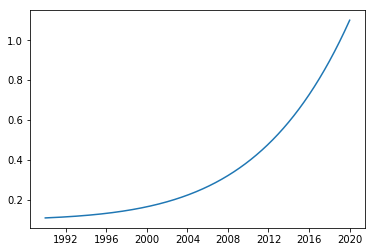

In [5]:
def anneal(t,p=7):
    #pd.to_datetime('2020-01-01')-pd.to_datetime('1989-01-01')=11322
    return (2-(pd.to_datetime('2020-01-01')-pd.to_datetime(t)).days/11322)**p
    
tanneal={}
anneal2020=anneal(pd.to_datetime('2020'))
for t in pd.date_range('1990','2020'):
    tanneal[t]=anneal(t)/anneal2020+0.1
plt.plot(tanneal.keys(),tanneal.values())

https://www.mrgeek.me/technology/datascience/measuring-influence-in-a-group-using-social-network-analysis/

In [6]:
tipusok={'Bizottság':['Bizottság'], 
         'Ország':['Ország'], 
         'Megye':['Párt','Bizottság','Ország'], 
         'Párt':['Bizottság','Ország']}
edges={'Total':{'Total':{}}}
members_set=df.reset_index()['Name'].unique()
for iname,name in enumerate(members_set[:]):
    if iname%100==0: print(iname/len(members_set)*100,'%')
    sdf=df.loc[name]
    csoportok=sdf.index
    tipus=sdf['Típus'].values
    start=sdf['start'].astype('datetime64').dt.date.values
    end=sdf['end'].astype('datetime64').dt.date.values
    for t in pd.date_range(min(sdf['start']),max(sdf['end'])):
        td=t.date()
        for i in range(len(csoportok)):
            csop=csoportok[i]
            tip=tipus[i]
            if tip in tipusok:
                if start[i]<td<end[i]:
                    for j in range(len(csoportok)):
                        if i!=j:
                            csop2=csoportok[j]
                            tip2=tipus[j]
                            if tip2 in tipusok[tip]:
                                if start[j]<td<end[j]:
                                    nset=tuple(np.sort([csop,csop2]))
                                    v=1
                                    
                                    if tip not in edges:edges[tip]={}
                                    if tip2 not in edges[tip]:edges[tip][tip2]={}
                                    if nset not in edges[tip][tip2]:edges[tip][tip2][nset]={'anneal':0,'values':0}
                                    edges[tip][tip2][nset]['values']+=v
                                    edges[tip][tip2][nset]['anneal']+=v*tanneal[t]

                                    if nset not in edges['Total']['Total']:edges['Total']['Total'][nset]={'anneal':0,'values':0}
                                    edges['Total']['Total'][nset]['values']+=v
                                    edges['Total']['Total'][nset]['anneal']+=v*tanneal[t]

0.0 %
3.5855145213338115 %
7.171029042667623 %
10.756543564001435 %
14.342058085335246 %
17.927572606669056 %
21.51308712800287 %
25.098601649336683 %
28.684116170670492 %
32.269630692004306 %
35.85514521333811 %
39.440659734671925 %
43.02617425600574 %
46.61168877733955 %
50.197203298673365 %
53.78271782000718 %
57.368232341340985 %
60.9537468626748 %
64.53926138400861 %
68.12477590534242 %
71.71029042667622 %
75.29580494801003 %
78.88131946934385 %
82.46683399067766 %
86.05234851201148 %
89.63786303334528 %
93.2233775546791 %
96.80889207601291 %


In [10]:
import pickle

In [45]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [12]:
save_obj(edges,'plotter_csoportok_edges')

In [ ]:
edges2=load_obj('plotter_csoportok_edges')

In [13]:
tipuskonverter=df.reset_index()[['Csoportok','Típus']].drop_duplicates().set_index('Csoportok').to_dict()['Típus']

In [14]:
def order(links,tip,tip2):
    for link in links:
        if link['source_type']!=tip:
            source=str(link['source'])
            target=str(link['target'])
            link['source']=target
            link['target']=source
            link['source_type']=tip
            link['target_type']=tip2
    return links

In [88]:
network={}
for tip in edges:
    for tip2 in edges[tip]:
        
        #create graph
        edgelist=[]
        for e in edges[tip][tip2]:
            edgelist.append((e[0],e[1],edges[tip][tip2][e]['anneal']))
        G=nx.Graph()
        G.add_weighted_edges_from(edgelist)

        links=[]
        for e in G.edges(data=True):
            links.append({'source':e[0],'target':e[1],
                          'value':e[2]['weight'],
                          'source_type':tipuskonverter[e[0]],
                          'target_type':tipuskonverter[e[1]]
                         })
        links=order(links,tip,tip2)
        
        means=pd.DataFrame(links).groupby('source')['value'].median().to_dict()
        meant=pd.DataFrame(links).groupby('target')['value'].median().to_dict()
        nmeans=np.median(list(means.values()))
        nmeant=np.median(list(meant.values()))
            
        #recalculate with new weights
        edgelist=[(i['source'],i['target'],{'relative':i['value']/means[i['source']],'value':i['value']}) for i in links]+\
                 [(i['target'],i['source'],{'relative':i['value']/meant[i['target']],'value':i['value']}) for i in links]
        for link in links:
            #start writing then it becomes clear
            link['mean']=(link['value']*2)/(means[link['source']]+meant[link['target']])
            link['nmean']=1/ ((gmean*2)/(nmeant+nmeans)) #adjust for category importance amongst all categories
            link['wmean']=link['mean'] * link['nmean'] 
            
            link['geometric']=(link['value']**2)/(means[link['source']]*meant[link['target']])
            link['ngeometric']=1/ ((gmean**2)/(nmeant*nmeans)) #adjust for category importance amongst all categories
            link['wgeometric']=link['geometric'] * link['ngeometric'] 
            
        G=nx.DiGraph()
        G.add_weighted_edges_from(edgelist)

        pr = nx.pagerank(G,weight='value')
        mpr=np.median(list(pr.values()))
        nodes={i:{'id':i,'tipus':tipuskonverter[i],'pr':pr[i]/mpr} for i in pr}
        
        #save 
        if tip not in network:network[tip]={}
        network[tip][tip2]={'nodes':nodes,'links':links}
                                    
        print(tip,tip2,len(nodes),'nodes and',len(links),'edges')

LinAlgError: Array must not contain infs or NaNs

In [ ]:
network={}
for tip in edges:
    for tip2 in edges[tip]:
        
        #create graph
        edgelist=[]
        for e in edges[tip][tip2]:
            edgelist.append((e[0],e[1],edges[tip][tip2][e]['anneal']))
        G=nx.Graph()
        G.add_weighted_edges_from(edgelist)

        links=[]
        for e in G.edges(data=True):
            links.append({'source':e[0],'target':e[1],
                          'value':e[2]['weight'],
                          'source_type':tipuskonverter[e[0]],
                          'target_type':tipuskonverter[e[1]]
                         })
        links=order(links,tip,tip2)
        
        means=pd.DataFrame(links).groupby('source')['value'].median().to_dict()
        meant=pd.DataFrame(links).groupby('target')['value'].median().to_dict()
        nmeans=np.median(list(means.values()))
        nmeant=np.median(list(meant.values()))
            
        #recalculate with new weights
        edgelist=[(i['source'],i['target']) for i in links]+\
                 [(i['target'],i['source']) for i in links]
        personalization={(i['source'],i['target']):i['value']/means[i['source']] for i in links}
        personalization.update({(i['target'],i['source']):i['value']/meant[i['target']] for i in links})
        
        for link in links:
            #start writing then it becomes clear
            link['mean']=(link['value']*2)/(means[link['source']]+meant[link['target']])
            link['nmean']=1/ ((gmean*2)/(nmeant+nmeans)) #adjust for category importance amongst all categories
            link['wmean']=link['mean'] * link['nmean'] 
            
            link['geometric']=(link['value']**2)/(means[link['source']]*meant[link['target']])
            link['ngeometric']=1/ ((gmean**2)/(nmeant*nmeans)) #adjust for category importance amongst all categories
            link['wgeometric']=link['geometric'] * link['ngeometric'] 
            
        G=nx.DiGraph(G)
        
        #pr = nx.pagerank(G,weight='relative')
        pr = nx.pagerank_numpy(G,weight='relative',personalization=personalization)
        mpr=np.median(list(pr.values()))
        nodes={i:{'id':i,'tipus':tipuskonverter[i],'pr':pr[i]/mpr} for i in pr}
        
        #save 
        if tip not in network:network[tip]={}
        network[tip][tip2]={'nodes':nodes,'links':links}
                                    
        print(tip,tip2,len(nodes),'nodes and',len(links),'edges')

In [83]:
pr

{'🌷 RMDSZ - Romániai Magyar Demokrata Szövetség': 0.026020376055621356,
 '🇨🇺 Kuba': 0.004851837223449517,
 '🔱 PRM - Partidul România Mare': 0.023885780423054268,
 '🌹 PSD - Partidul Social Democrat': 0.02866590517298517,
 '🔶 PDL - Partidul Democrat Liberal': 0.025410842076793585,
 '🕊️ PC - Partidul Conservator': 0.022629494104069656,
 '🕊️ PUR-SL - Partidul Umanist din România': 0.02109308148107953,
 '📐 PNL - Partidul Naţional Liberal': 0.02829363599012981,
 '⚛️ PP-DD - Partidul Poporului Dan Diaconescu': 0.026036782065782155,
 '👤 Independent - Independent': 0.02866590517298517,
 '🕊️ ALDE - Partidul Alianţa Liberalilor şi Democraţilor': 0.02500273470585775,
 '🌹 PDSR - Partidul Democraţiei Sociale din România': 0.02134143625988721,
 '✳️ PNTCD - Partidul Naţional Ţărănesc Creştin Democrat': 0.019134569234901373,
 '🔶 PD - Partidul Democrat': 0.025380018584278727,
 '🍏 PMP - Partidul Mişcarea Populară': 0.024713674947327402,
 '🔷 USR - Uniunea Salvaţi România': 0.027824422098004557,
 '🇩🇿 Algér

In [70]:
pr

{'🌷 RMDSZ - Romániai Magyar Demokrata Szövetség': 0.02602197879845518,
 '🇨🇺 Kuba': 0.004851567098252788,
 '🔱 PRM - Partidul România Mare': 0.023887275115809462,
 '🌹 PSD - Partidul Social Democrat': 0.028667651982590595,
 '🔶 PDL - Partidul Democrat Liberal': 0.025412426811281016,
 '🕊️ PC - Partidul Conservator': 0.022630898755092572,
 '🕊️ PUR-SL - Partidul Umanist din România': 0.021094396090370244,
 '📐 PNL - Partidul Naţional Liberal': 0.028295364791388777,
 '⚛️ PP-DD - Partidul Poporului Dan Diaconescu': 0.02603840281696248,
 '👤 Independent - Independent': 0.028667651982590595,
 '🕊️ ALDE - Partidul Alianţa Liberalilor şi Democraţilor': 0.025004265415305805,
 '🌹 PDSR - Partidul Democraţiei Sociale din România': 0.021342768877524346,
 '✳️ PNTCD - Partidul Naţional Ţărănesc Creştin Democrat': 0.019135757785766924,
 '🔶 PD - Partidul Democrat': 0.025381549293726775,
 '🍏 PMP - Partidul Mişcarea Populară': 0.024715187648429053,
 '🔷 USR - Uniunea Salvaţi România': 0.027826132890917076,
 '🇩🇿 A

In [67]:
open('json/plotter_csoportok.json','w').write(json.dumps(network))

7125488

In [69]:
N=5000
n=15
key='geometric'
for tip in tipusok:
    for tip2 in tipusok[tip]:
        print('\n------',tip,tip2,'------')
        g=[i for i in network[tip][tip2]['links'] if i['value']>N]
        
        print('          ------by value------')
        nset1=set()
        for k,i in enumerate(sorted(g, key=lambda k: k['value'],reverse=True)[:n]):
            if k<5:
                print(i['source'],i['target'],i[key],i['value'])
            nset1.add(tuple(np.sort([i['source'],i['target']])))
                                    
        print('          ------by '+key+'------')
        nset2=set()
        for k,i in enumerate(sorted(g, key=lambda k: k[key],reverse=True)[:n]):
            if k<5:
                print(i['source'],i['target'],i[key],i['value'])
            nset2.add(tuple(np.sort([i['source'],i['target']])))
            
        print('          ------common------')
        for i in nset1.intersection(nset2):
            print(i)


------ Bizottság Bizottság ------
          ------by value------
⏫ Gazdaság, ipar ➿ Infrastruktúra, energia, kommunikáció 6.3815852945016855 24729.79357480326
🔀 Állami ügyek 🚻 Munka, szociális és családi ügyek 2.770967662287746 22988.38533477297
🚻 Munka, szociális és családi ügyek 🔄 Közigazgatás, környezetvédelem 2.721019701321973 22978.028420834973
🔀 Állami ügyek 🔄 Közigazgatás, környezetvédelem 2.503839384409689 21451.718851576206
⏺️ Európa ⏫ Gazdaság, ipar 2.5424269852369554 20345.724792275054
          ------by geometric------
⏫ Gazdaság, ipar ➿ Infrastruktúra, energia, kommunikáció 6.3815852945016855 24729.79357480326
➿ Infrastruktúra, energia, kommunikáció 🔄 Közigazgatás, környezetvédelem 5.214994533327797 19676.21109542993
🛃 Biztonság 🌐 Külpolitika, diaszpóra 4.753380998921376 7375.420321314794
➿ Infrastruktúra, energia, kommunikáció 🛃 Biztonság 4.555302494401599 10766.304167201957
🔀 Állami ügyek 🚹 Emberi jogok, kisebbségek 3.503115673195939 16457.96633761585
          ------co

Plots